# K 近邻

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

数据分布比较

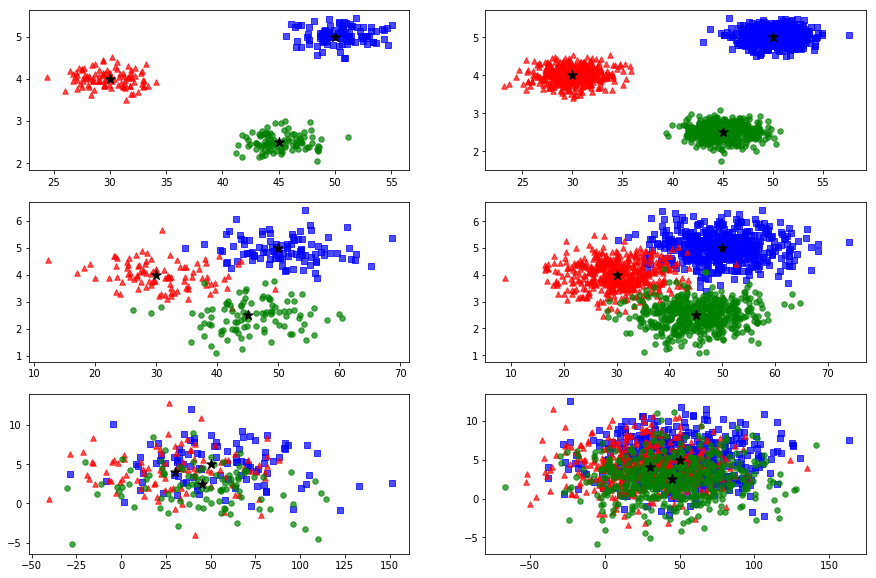

In [9]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.axis((10, 70, 1, 7))


def subgraph(sigma1, sigma2, index, count=100):
    x1 = np.random.normal(50, sigma1, count)
    y1 = np.random.normal(5, sigma2, count)

    x2 = np.random.normal(30, sigma1, count)
    y2 = np.random.normal(4, sigma2, count)

    x3 = np.random.normal(45, sigma1, count)
    y3 = np.random.normal(2.5, sigma2, count)

    plt.subplot(3, 2, index)
    plt.scatter(x1, y1, c='b', marker='s', s=30, alpha=0.7)
    plt.scatter(x2, y2, c='r', marker='^', s=30, alpha=0.7)
    plt.scatter(x3, y3, c='g', s=30, alpha=0.7)
    plt.scatter([50, 30, 45], [5, 4, 2.5], c='k', marker='*', s=100, alpha=1.0)


subgraph(2, 0.2, 1, 100)
subgraph(2, 0.2, 2, 500)
subgraph(6, 0.5, 3, 100)
subgraph(6, 0.5, 4, 500)
subgraph(30, 2.5, 5, 100)
subgraph(30, 2.5, 6, 500)

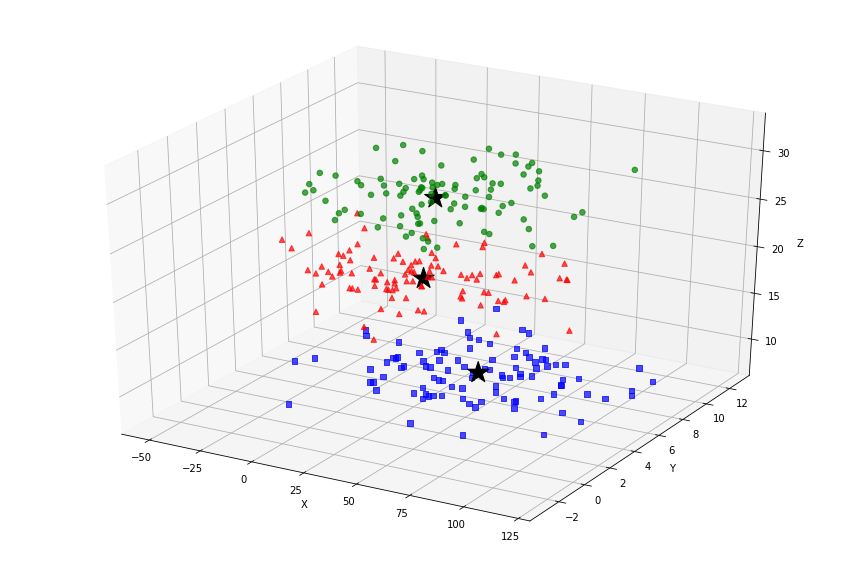

In [12]:
import mpl_toolkits.mplot3d

ax = plt.subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

count = 100
sigma1, sigma2 = 30, 2.5
x1 = np.random.normal(50, sigma1, count)
y1 = np.random.normal(5, sigma2, count)
z1 = np.random.normal(10, 1, count)

x2 = np.random.normal(30, sigma1, count)
y2 = np.random.normal(4, sigma2, count)
z2 = np.random.normal(20, 1, count)

x3 = np.random.normal(45, sigma1, count)
y3 = np.random.normal(2.5, sigma2, count)
z3 = np.random.normal(30, 1, count)

ax.scatter(x1, y1, z1, c='b', marker='s', s=30, alpha=0.7)
ax.scatter(x2, y2, z2, c='r', marker='^', s=30, alpha=0.7)
ax.scatter(x3, y3, z3, c='g', s=30, alpha=0.7)
ax.scatter([50, 30, 45], [5, 4, 2.5], [10, 20, 30], c='k', marker='*', s=500, alpha=1.0)

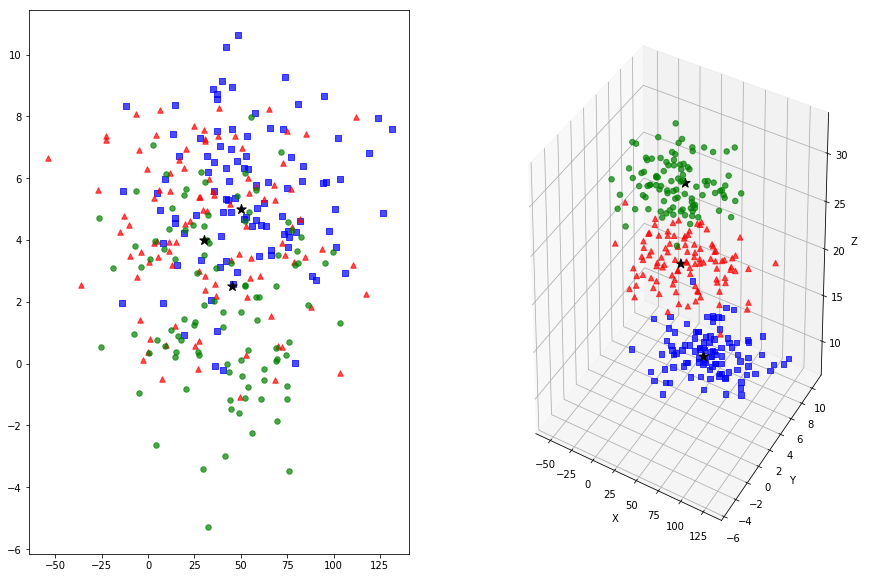

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

plt.figure()


count = 100
sigma1, sigma2 = 30, 2.5
x1 = np.random.normal(50, sigma1, count)
y1 = np.random.normal(5, sigma2, count)
z1 = np.random.normal(10, 1, count)

x2 = np.random.normal(30, sigma1, count)
y2 = np.random.normal(4, sigma2, count)
z2 = np.random.normal(20, 1, count)

x3 = np.random.normal(45, sigma1, count)
y3 = np.random.normal(2.5, sigma2, count)
z3 = np.random.normal(30, 1, count)

sp = plt.subplot(121)
sp.scatter(x1, y1, c='b', marker='s', s=30, alpha=0.7)
sp.scatter(x2, y2, c='r', marker='^', s=30, alpha=0.7)
sp.scatter(x3, y3, c='g', s=30, alpha=0.7)
sp.scatter([50, 30, 45], [5, 4, 2.5], c='k', marker='*', s=100, alpha=1.0)


# z = [0] * count
# z1 = z2 = z3 = z

ax = plt.subplot(122, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(x1, y1, z1, c='b', marker='s', s=30, alpha=0.7)
ax.scatter(x2, y2, z2, c='r', marker='^', s=30, alpha=0.7)
ax.scatter(x3, y3, z3, c='g', s=30, alpha=0.7)
# ax.scatter([50, 30, 45], [5, 4, 2.5], [0, 0, 0], c='k', marker='*', s=500, alpha=1.0)
ax.scatter([50, 30, 45], [5, 4, 2.5], [10, 20, 30], c='k', marker='*', s=100, alpha=1.0)

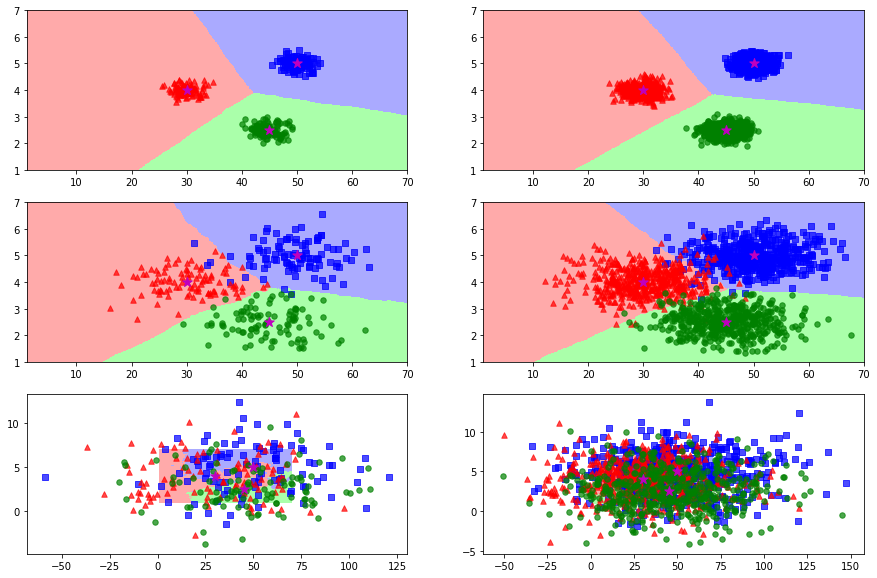

In [8]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.axis((10, 70, 1, 7))


def subgraph(sigma1, sigma2, index, count=100):
    x1 = np.random.normal(50, sigma1, count)
    y1 = np.random.normal(5, sigma2, count)

    x2 = np.random.normal(30, sigma1, count)
    y2 = np.random.normal(4, sigma2, count)

    x3 = np.random.normal(45, sigma1, count)
    y3 = np.random.normal(2.5, sigma2, count)

    x_val = np.concatenate((x1, x2, x3))
    y_val = np.concatenate((y1, y2, y3))

    x_diff = max(x_val) - min(x_val)
    y_diff = max(y_val) - min(y_val)

    x_normalized = x_val / x_diff
    y_normalized = y_val / y_diff
    xy_normalized = list(zip(x_normalized, y_normalized))

    clf = neighbors.KNeighborsClassifier(30)
    labels = [1] * count + [2] * count + [3] * count

    clf.fit(xy_normalized, labels)

    # nearests = clf.kneighbors([(50 / x_diff, 5 / y_diff), (30 / x_diff, 3 / y_diff)], 5, False)

    xx,yy = np.meshgrid(np.arange(1, 70.1, 0.1), np.arange(1, 7.01, 0.01))
    xx_normalized = xx / x_diff
    yy_normalized = yy / y_diff
    coords = np.c_[xx_normalized.ravel(), yy_normalized.ravel()]

    Z = clf.predict(coords)
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, index)
    light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA','#AAFFAA'])
    plt.pcolormesh(xx, yy, Z, cmap=light_rgb)
    plt.scatter(x1, y1, c='b', marker='s', s=30, alpha=0.7)
    plt.scatter(x2, y2, c='r', marker='^', s=30, alpha=0.7)
    plt.scatter(x3, y3, c='g', s=30, alpha=0.7)
    plt.scatter([50, 30, 45], [5, 4, 2.5], c='m', marker='*', s=100, alpha=1.0)


subgraph(2, 0.2, 1, 100)
subgraph(2, 0.2, 2, 500)
subgraph(6, 0.5, 3, 100)
subgraph(6, 0.5, 4, 500)
subgraph(30, 2.5, 5, 100)
subgraph(30, 2.5, 6, 500)

55.2371809797
5.51093710377
[[   4   47   41   40    6]
 [1756 2311  448 1121  720]]


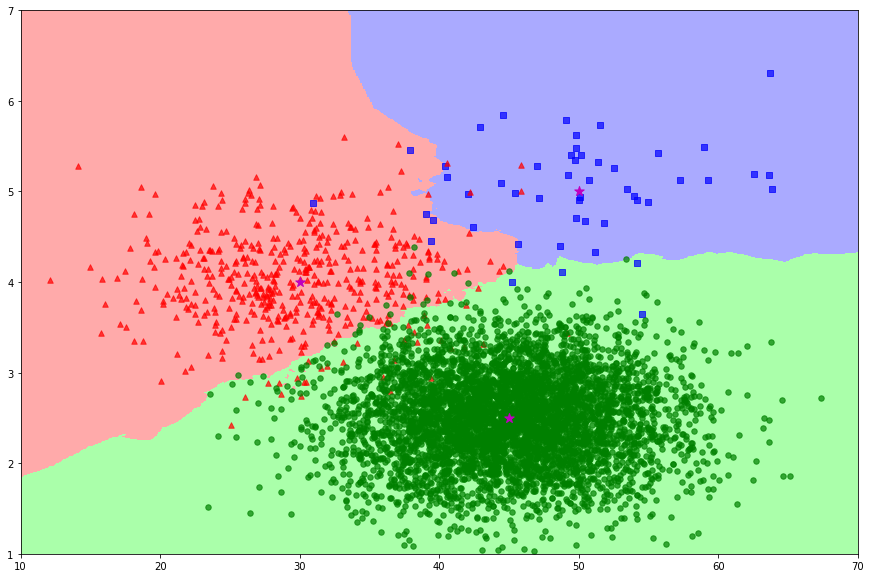

In [10]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

x1 = np.random.normal(50, 6, 50)
y1 = np.random.normal(5, 0.5, 50)
# plt.scatter(x1, y1, c='b', marker='s', s=50, alpha=0.8)

x2 = np.random.normal(30, 6, 500)
y2 = np.random.normal(4, 0.5, 500)
# plt.scatter(x2, y2, c='r', marker='^', s=50, alpha=0.8)

x3 = np.random.normal(45, 6, 5000)
y3 = np.random.normal(2.5, 0.5, 5000)
# plt.scatter(x3, y3, c='g', s=50, alpha=0.8)

plt.axis((10, 70, 1, 7))

x_val = np.concatenate((x1, x2, x3))
y_val = np.concatenate((y1, y2, y3))

x_diff = max(x_val) - min(x_val)
y_diff = max(y_val) - min(y_val)

print(x_diff)
print(y_diff)

x_normalized = x_val / x_diff
y_normalized = y_val / y_diff
xy_normalized = list(zip(x_normalized, y_normalized))


clf = neighbors.KNeighborsClassifier(10)
labels = [1] * 50 + [2] * 500 + [3] * 5000

clf.fit(xy_normalized, labels)

nearests = clf.kneighbors([(50 / x_diff, 5 / y_diff), (30 / x_diff, 3 / y_diff)], 5, False)

print(nearests)

xx,yy = np.meshgrid(np.arange(1, 70.1, 0.1), np.arange(1, 7.01, 0.01))
xx_normalized = xx / x_diff
yy_normalized = yy / y_diff
coords = np.c_[xx_normalized.ravel(), yy_normalized.ravel()]

Z = clf.predict(coords)
Z = Z.reshape(xx.shape)

light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=light_rgb)


plt.scatter(x1, y1, c='b', marker='s', s=30, alpha=0.7)
plt.scatter(x2, y2, c='r', marker='^', s=30, alpha=0.7)
plt.scatter(x3, y3, c='g', s=30, alpha=0.7)

plt.scatter([50, 30, 45], [5, 4, 2.5], c='m', marker='*', s=100, alpha=1.0)